In [1]:
!pip install yfinance==0.1.67
#!pip install pandas==1.3.3
#!pip install requests==2.26.0
!mamba install bs4==4.10.0 -y
#!pip install plotly==5.3.1
!mamba install html5lib==1.1 -y
!pip install lxml==4.6.4

  Preparing metadata (setup.py) ... done
  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8498 sha256=b912660f2e74778bced17027503247c0414c9656aa12cc2519d6e692ff0b2563
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/34/ba/79/c0260c6f1a03f420ec7673eff9981778f293b9107974679e36
Successfully built multitasking

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [4]:
tesla=yf.Ticker('TSLA')

In [5]:
tesla_data=tesla.history(period='max')

In [6]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


In [8]:
url="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2022-01-01"
html_data=requests.get(url).text

In [9]:
soup = BeautifulSoup(html_data, 'html5lib')

In [10]:
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for row in soup.find_all("tbody")[1].find_all('tr'):
    col = row.find_all('td')
    Date = col[0].text
    Revenue = col[1].text
    tesla_revenue = tesla_revenue.append({'Date':Date , 'Revenue':Revenue }, ignore_index=True)
    tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
    tesla_revenue.dropna(inplace=True)
    tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue    

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Date,Revenue
0,2022-03-31,18756
1,2021-12-31,17719
2,2021-09-30,13757
3,2021-06-30,11958
4,2021-03-31,10389
5,2020-12-31,10744
6,2020-09-30,8771
7,2020-06-30,6036
8,2020-03-31,5985
9,2019-12-31,7384


In [23]:
tesla_revenue[46:51]

,Date,Revenue
46,2010-09-30,31
47,2010-06-30,28
48,2010-03-31,21
49,2009-09-30,46
50,2009-06-30,27


In [11]:
GameStop=yf.Ticker('GME')

In [12]:
gme_data=GameStop.history(period='max')

In [28]:
gme_data.reset_index(inplace=True)
gme_data.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2002-02-13,6.480515,6.773401,6.413184,6.766667,19054000,0.0,0.0
1,1,2002-02-14,6.850830,6.864296,6.682505,6.733002,2755400,0.0,0.0
2,2,2002-02-15,6.733002,6.749834,6.632007,6.699337,2097400,0.0,0.0
3,3,2002-02-19,6.665670,6.665670,6.312188,6.430016,1852600,0.0,0.0
4,4,2002-02-20,6.463680,6.648838,6.413182,6.648838,1723200,0.0,0.0


In [16]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data=requests.get(url).text

In [17]:
soup = BeautifulSoup(html_data, 'html5lib')

In [19]:
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for row in soup.find_all("tbody")[1].find_all('tr'):
    col = row.find_all('td')
    Date = col[0].text
    Revenue = col[1].text
    gme_revenue = gme_revenue.append({'Date':Date , 'Revenue':Revenue }, ignore_index=True)
    gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
    gme_revenue.dropna(inplace=True)
    gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
gme_revenue

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Date,Revenue
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548
...,...,...
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475


In [22]:
gme_revenue[57:62]

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


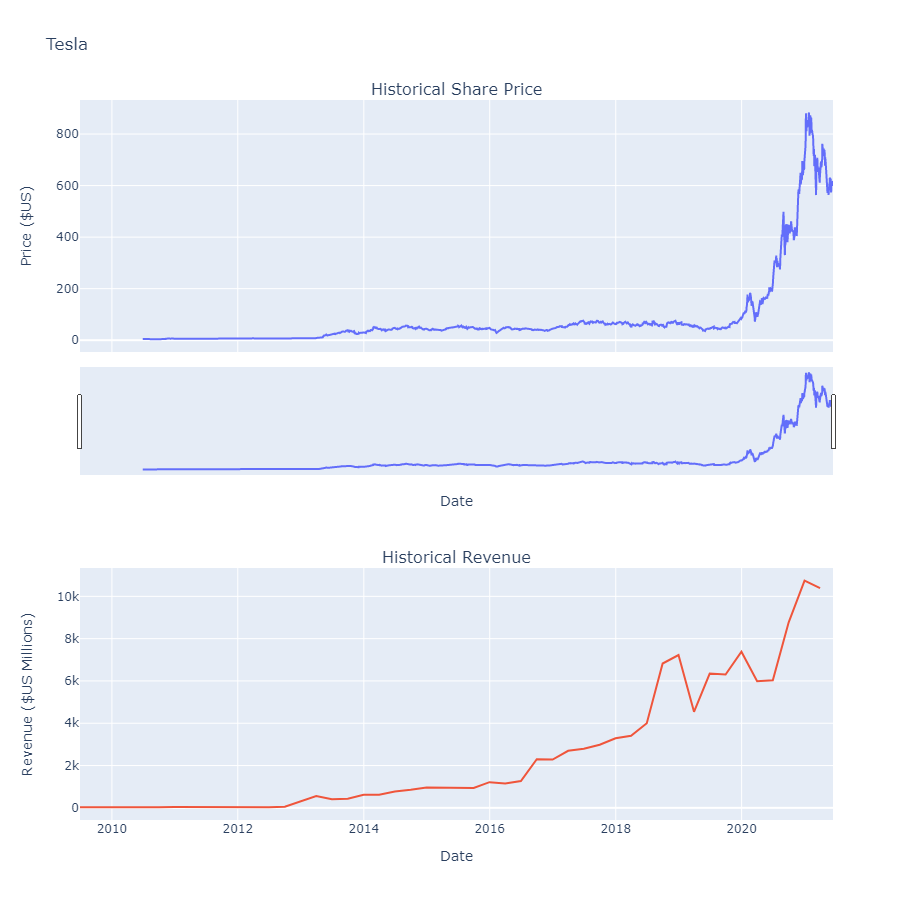

In [27]:
make_graph(tesla_data,tesla_revenue,'Tesla')

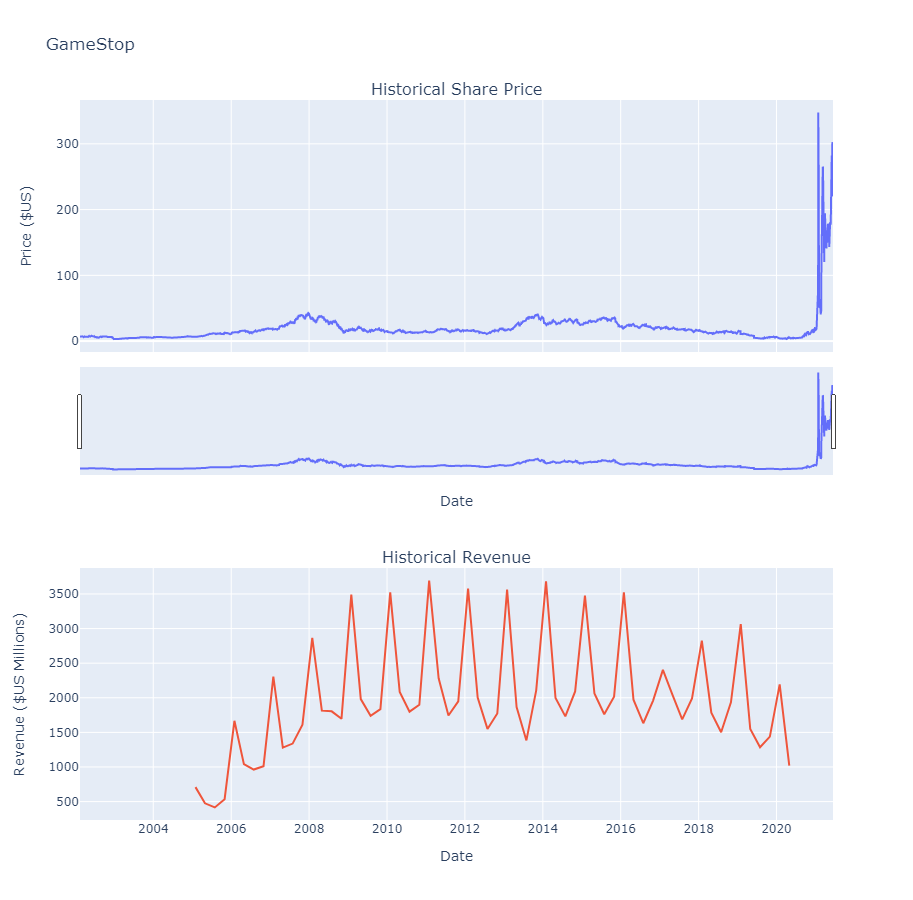

In [26]:
make_graph(gme_data, gme_revenue, 'GameStop')